# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
!cat api_keys.py

# OpenWeatherMap API Key
weather_api_key = "e03356a0ce25d940217bf57988fa5332"

# Geoapify API Key
geoapify_key = "68e79185172a472c82d20c673f6a5628"


In [11]:
geoapify_key

'68e79185172a472c82d20c673f6a5628'

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

In [14]:
weather_api_key


'e03356a0ce25d940217bf57988fa5332'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))
        
#     except Exception as e:
#         print(e)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | bethel
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.3712,
        "lon": -73.414
    },
    "dt": 1701040699,
    "id": 5282297,
    "main": {
        "feels_like": 4.76,
        "humidity": 81,
        "pressure": 1014,
        "temp": 7.61,
        "temp_max": 9.31,
        "temp_min": 5.53
    },
    "name": "Bethel",
    "sys": {
        "country": "US",
        "id": 2004826,
        "sunrise": 1700999685,
        "sunset": 1701034045,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 4.63
    }
}
Processing Record 2 of Set 1 | port-aux-francais
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -2.9627,
        "lon": 119.9001
    },
    "dt": 1701040703,
    "id": 1629974,
    "main": {
        "feels_like": 22.01,
        "grnd_level": 925,
        "humidity": 93,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 21.39,
        "temp_max": 21.39,
        "temp_min": 21.39
    },
    "name": "Malango",
    "sys": {
        "country": "ID",
        "sunrise": 1701034792,
        "sunset": 1701078966
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 285,
        "gust": 0.85,
        "speed": 0.46
    }
}
Processing Record 14 of Set 1 | mount pearl
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 56.1725,
        "lon": 107.4458
    },
    "dt": 1701040705,
    "id": 2020584,
    "main": {
        "feels_like": -17.57,
        "grnd_level": 983,
        "humidity": 90,
        "pressure": 1037,
        "sea_level": 1037,
        "temp": -17.57,
        "temp_max": -17.57,
        "temp_min": -17.57
    },
    "name": "Magistral'nyy",
    "sys": {
        "country": "RU",
        "id": 2088327,
        "sunrise": 1701046198,
        "sunset": 1701073538,
        "type": 2
    },
    "timezone": 28800,
    "visibility": 3372,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 225,
        "gust": 0.93,
        "speed": 0.61
    }
}
Processing Record 25 of Set 1 | ola
{
    "base": "stations",
    "clouds": {
        "all": 1

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 11.2278,
        "lon": 169.8474
    },
    "dt": 1701040708,
    "id": 7306518,
    "main": {
        "feels_like": 30.63,
        "grnd_level": 1012,
        "humidity": 72,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 27.85,
        "temp_max": 27.85,
        "temp_min": 27.85
    },
    "name": "Utrik",
    "sys": {
        "country": "MH",
        "sunrise": 1701024118,
        "sunset": 1701065659
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "gust": 10.09,
        "speed": 9.21
    }
}
Processing Record 35 of Set 1 | chonchi
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
       

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 65.5333,
        "lon": 72.5167
    },
    "dt": 1701040710,
    "id": 1498087,
    "main": {
        "feels_like": -23.39,
        "grnd_level": 1027,
        "humidity": 98,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": -16.39,
        "temp_max": -16.39,
        "temp_min": -16.39
    },
    "name": "Nadym",
    "sys": {
        "country": "RU",
        "sunrise": 1701059575,
        "sunset": 1701076931
    },
    "timezone": 18000,
    "visibility": 4772,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 212,
        "gust": 3.45,
        "speed": 3.48
    }
}
Processing Record 45 of Set 1 | celestun
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -12.1568,
        "lon": 96.8225
    },
    "dt": 1701040713,
    "id": 7304591,
    "main": {
        "feels_like": 25.99,
        "humidity": 73,
        "pressure": 1011,
        "temp": 25.99,
        "temp_max": 25.99,
        "temp_min": 25.99
    },
    "name": "West Island",
    "sys": {
        "country": "CC",
        "id": 9570,
        "sunrise": 1701039460,
        "sunset": 1701085377,
        "type": 1
    },
    "timezone": 23400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 5.14
    }
}
Processing Record 4 of Set 2 | kargasok
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 59.0556,
        "lon": 

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 14 of Set 2 | martinsburg
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 39.4562,
        "lon": -77.9639
    },
    "dt": 1701040716,
    "id": 4813878,
    "main": {
        "feels_like": 5.78,
        "humidity": 78,
        "pressure": 1008,
        "temp": 5.78,
        "temp_max": 6.71,
        "temp_min": 4.79
    },
    "name": "Martinsburg",
    "sys": {
        "country": "US",
        "id": 2084833,
        "sunrise": 1701000468,
        "sunset": 1701035446,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 114,
        "gust": 1.34,
        "speed": 0.45
    }
}
Processing Record 15 of Set 2

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.918,
        "lon": 25.5701
    },
    "dt": 1701040719,
    "id": 964420,
    "main": {
        "feels_like": 20.36,
        "humidity": 81,
        "pressure": 1022,
        "temp": 20.17,
        "temp_max": 20.17,
        "temp_min": 18.16
    },
    "name": "Port Elizabeth",
    "sys": {
        "country": "ZA",
        "id": 2072678,
        "sunrise": 1701054056,
        "sunset": 1701104990,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.57
    }
}
Processing Record 25 of Set 2 | nar'yan-mar
{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": 67.6713,
        "lon": 53

{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": -11.0925,
        "lon": -77.6267
    },
    "dt": 1701040721,
    "id": 3946147,
    "main": {
        "feels_like": 20.62,
        "grnd_level": 1008,
        "humidity": 79,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 20.46,
        "temp_max": 20.46,
        "temp_min": 20.46
    },
    "name": "Caleta de Carqu\u00edn",
    "sys": {
        "country": "PE",
        "sunrise": 1700995027,
        "sunset": 1701040726
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 177,
        "gust": 5.6,
        "speed": 5.23
    }
}
Processing Record 35 of Set 2 | cananeia
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
  

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 64.5667,
        "lon": 143.2
    },
    "dt": 1701040723,
    "id": 2120048,
    "main": {
        "feels_like": -31.84,
        "grnd_level": 948,
        "humidity": 96,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": -24.84,
        "temp_max": -24.84,
        "temp_min": -24.84
    },
    "name": "Ust-Nera",
    "sys": {
        "country": "RU",
        "sunrise": 1701041786,
        "sunset": 1701060785
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 26,
        "gust": 3.94,
        "speed": 3.15
    }
}
Processing Record 45 of Set 2 | ribeira brava
{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": 52.9306,
        "lon": 158.4028
    },
    "dt": 1701040726,
    "id": 2118647,
    "main": {
        "feels_like": -13.28,
        "grnd_level": 995,
        "humidity": 78,
        "pressure": 997,
        "sea_level": 997,
        "temp": -7.82,
        "temp_max": -7.82,
        "temp_min": -9.3
    },
    "name": "Vilyuchinsk",
    "sys": {
        "country": "RU",
        "id": 2088272,
        "sunrise": 1701032951,
        "sunset": 1701062321,
        "type": 2
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 262,
        "gust": 6.77,
        "speed": 3.36
    }
}
Processing Record 5 of Set 3 | saint-joseph
{
    "base": "stations",
    "clouds": {
        "all":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 50.0501,
        "lon": -110.6683
    },
    "dt": 1701040728,
    "id": 6071618,
    "main": {
        "feels_like": 0.55,
        "humidity": 73,
        "pressure": 1019,
        "temp": 3.07,
        "temp_max": 3.55,
        "temp_min": 2.69
    },
    "name": "Medicine Hat",
    "sys": {
        "country": "CA",
        "id": 2011978,
        "sunrise": 1701010360,
        "sunset": 1701041256,
        "type": 2
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 2.57
    }
}
Processing Record 15 of Set 3 | udachny
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 66.4167,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 69
    },
    "cod": 200,
    "coord": {
        "lat": -22.9661,
        "lon": -42.0278
    },
    "dt": 1701040730,
    "id": 3471451,
    "main": {
        "feels_like": 23.28,
        "grnd_level": 1017,
        "humidity": 77,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 22.92,
        "temp_max": 22.92,
        "temp_min": 22.92
    },
    "name": "Arraial do Cabo",
    "sys": {
        "country": "BR",
        "sunrise": 1700985261,
        "sunset": 1701033401
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 75,
        "gust": 7.69,
        "speed": 6.82
    }
}
Processing Record 25 of Set 3 | hammerfest
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -20.9333,
        "lon": 29
    },
    "dt": 1701040733,
    "id": 890516,
    "main": {
        "feels_like": 22.65,
        "grnd_level": 908,
        "humidity": 39,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 23.25,
        "temp_max": 23.25,
        "temp_min": 23.25
    },
    "name": "Gwanda",
    "sys": {
        "country": "ZW",
        "sunrise": 1701054836,
        "sunset": 1701102563
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 77,
        "gust": 8.59,
        "speed": 2.96
    }
}
Processing Record 36 of Set 3 | ghanzi
{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": -21.5667,


{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        "lat": -8.5421,
        "lon": -172.5159
    },
    "dt": 1701040735,
    "id": 7522183,
    "main": {
        "feels_like": 35.41,
        "grnd_level": 1008,
        "humidity": 75,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 29.67,
        "temp_max": 29.67,
        "temp_min": 29.67
    },
    "name": "Atafu Village",
    "rain": {
        "1h": 0.33
    },
    "sys": {
        "country": "TK",
        "sunrise": 1701104458,
        "sunset": 1701149691
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 118,
        "gust": 6.48,
        "speed": 5.9
    }
}
Processing Record 46 of Set 3 | ijuw
{
    "cod": "404",
    "message": "city not found"
}
City not found

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -2.5744,
        "lon": 150.7967
    },
    "dt": 1701040737,
    "id": 2094342,
    "main": {
        "feels_like": 33.76,
        "grnd_level": 1008,
        "humidity": 71,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 29.37,
        "temp_max": 29.37,
        "temp_min": 29.37
    },
    "name": "Kavieng",
    "sys": {
        "country": "PG",
        "sunrise": 1701027411,
        "sunset": 1701071513
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 25,
        "gust": 2.45,
        "speed": 2.44
    }
}
Processing Record 6 of Set 4 | urangan
{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 39.3558,
        "lon": -9.3811
    },
    "dt": 1701040740,
    "id": 2264923,
    "main": {
        "feels_like": 11.5,
        "grnd_level": 1019,
        "humidity": 73,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 12.31,
        "temp_max": 12.47,
        "temp_min": 11.07
    },
    "name": "Peniche",
    "sys": {
        "country": "PT",
        "id": 2002665,
        "sunrise": 1700983980,
        "sunset": 1701019007,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 336,
        "gust": 2.94,
        "speed": 2.71
    }
}
Processing Record 16 of Set 4 | boma
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": 69.4058,
        "lon": 86.1778
    },
    "dt": 1701040742,
    "id": 1507116,
    "main": {
        "feels_like": -34.26,
        "grnd_level": 1034,
        "humidity": 100,
        "pressure": 1039,
        "sea_level": 1039,
        "temp": -27.26,
        "temp_max": -27.26,
        "temp_min": -27.26
    },
    "name": "Dudinka",
    "sys": {
        "country": "RU",
        "sunrise": 1701062122,
        "sunset": 1701067825
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 144,
        "gust": 2.2,
        "speed": 2.25
    }
}
Processing Record 27 of Set 4 | ha'il
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -35.4323,
        "lon": -60.1727
    },
    "dt": 1701040745,
    "id": 3833112,
    "main": {
        "feels_like": 24.8,
        "humidity": 48,
        "pressure": 1013,
        "temp": 24.99,
        "temp_max": 24.99,
        "temp_min": 24.99
    },
    "name": "Veinticinco de Mayo",
    "sys": {
        "country": "AR",
        "id": 2019609,
        "sunrise": 1700988028,
        "sunset": 1701039345,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 315,
        "gust": 3.58,
        "speed": 1.34
    }
}
Processing Record 37 of Set 4 | remire-montjoly
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 9.1769,
        "lon": 105.15
    },
    "dt": 1701040697,
    "id": 1586443,
    "main": {
        "feels_like": 24.82,
        "grnd_level": 1009,
        "humidity": 95,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 23.89,
        "temp_max": 23.89,
        "temp_min": 23.89
    },
    "name": "Ca Mau",
    "sys": {
        "country": "VN",
        "sunrise": 1701039457,
        "sunset": 1701081382
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 39,
        "gust": 8.96,
        "speed": 2.8
    }
}
Processing Record 47 of Set 4 | tommot
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 15.1355,
        "lon": 145.701
    },
    "dt": 1701040676,
    "id": 4041552,
    "main": {
        "feels_like": 35.61,
        "humidity": 79,
        "pressure": 1013,
        "temp": 29.39,
        "temp_max": 29.39,
        "temp_min": 29.39
    },
    "name": "Saipan",
    "sys": {
        "country": "MP",
        "id": 7855,
        "sunrise": 1701030293,
        "sunset": 1701071077,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "gust": 12.86,
        "speed": 8.75
    }
}
Processing Record 7 of Set 5 | chos malal
{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "lat": -37.3781,
     

{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {
        "lat": 23.6363,
        "lon": 102.8264
    },
    "dt": 1701040754,
    "id": 1806146,
    "main": {
        "feels_like": 10.69,
        "grnd_level": 873,
        "humidity": 93,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 11.1,
        "temp_max": 11.1,
        "temp_min": 11.1
    },
    "name": "Jianshui",
    "sys": {
        "country": "CN",
        "sunrise": 1701041464,
        "sunset": 1701080491
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 52,
        "gust": 1.13,
        "speed": 1.09
    }
}
Processing Record 18 of Set 5 | dwarka
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 22

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 1.05,
        "lon": 101.2833
    },
    "dt": 1701040758,
    "id": 1650600,
    "main": {
        "feels_like": 24.11,
        "grnd_level": 1009,
        "humidity": 99,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 23.15,
        "temp_max": 23.15,
        "temp_min": 23.15
    },
    "name": "Balaipungut",
    "sys": {
        "country": "ID",
        "sunrise": 1701039631,
        "sunset": 1701083064
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 335,
        "gust": 3.7,
        "speed": 0.81
    }
}
Processing Record 29 of Set 5 | eyl
{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 26.9333,
        "lon": -105.6667
    },
    "dt": 1701040762,
    "id": 4004867,
    "main": {
        "feels_like": 15.82,
        "grnd_level": 831,
        "humidity": 29,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 17.28,
        "temp_max": 17.28,
        "temp_min": 17.28
    },
    "name": "Parral",
    "sys": {
        "country": "MX",
        "sunrise": 1701005454,
        "sunset": 1701043761
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 95,
        "gust": 4.41,
        "speed": 4.27
    }
}
Processing Record 40 of Set 5 | ingeniero guillermo n. juarez
{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 13.4667,
        "lon": 79.1167
    },
    "dt": 1701040764,
    "id": 1260830,
    "main": {
        "feels_like": 22.61,
        "grnd_level": 970,
        "humidity": 94,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 21.91,
        "temp_max": 21.91,
        "temp_min": 21.91
    },
    "name": "P\u0101k\u0101la",
    "sys": {
        "country": "IN",
        "sunrise": 1701046116,
        "sunset": 1701087222
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 329,
        "gust": 1.14,
        "speed": 1.08
    }
}
Processing Record 0 of Set 6 | kisanga
{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 53
    },
    "cod": 200,
    "coord": {
        "lat": 40.5156,
        "lon": 81.2636
    },
    "dt": 1701040767,
    "id": 1529641,
    "main": {
        "feels_like": 1.38,
        "grnd_level": 908,
        "humidity": 38,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": 2.79,
        "temp_max": 2.79,
        "temp_min": 2.79
    },
    "name": "Aral",
    "sys": {
        "country": "CN",
        "sunrise": 1701048859,
        "sunset": 1701083448
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 124,
        "gust": 1.59,
        "speed": 1.53
    }
}
Processing Record 9 of Set 6 | ulsteinvik
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": 6

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 34.1667,
        "lon": 77.5833
    },
    "dt": 1701040770,
    "id": 1264976,
    "main": {
        "feels_like": 0.16,
        "grnd_level": 673,
        "humidity": 34,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 0.16,
        "temp_max": 0.16,
        "temp_min": 0.16
    },
    "name": "Leh",
    "sys": {
        "country": "IN",
        "sunrise": 1701048800,
        "sunset": 1701085274
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 339,
        "gust": 0.89,
        "speed": 0.49
    }
}
Processing Record 19 of Set 6 | mahina
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -

{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": -8.103,
        "lon": 156.8419
    },
    "dt": 1701040773,
    "id": 2108857,
    "main": {
        "feels_like": 32.59,
        "grnd_level": 1008,
        "humidity": 75,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 28.54,
        "temp_max": 28.54,
        "temp_min": 28.54
    },
    "name": "Gizo Government Station",
    "rain": {
        "1h": 0.45
    },
    "sys": {
        "country": "SB",
        "sunrise": 1701025443,
        "sunset": 1701070578
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 40,
        "gust": 1.85,
        "speed": 1.18
    }
}
Processing Record 29 of Set 6 | carauari
{
    "base": "stations",
    "clouds": {
        "all":

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": 67.5833,
        "lon": 63.95
    },
    "dt": 1701040776,
    "id": 1486913,
    "main": {
        "feels_like": -23.7,
        "grnd_level": 1002,
        "humidity": 100,
        "pressure": 1027,
        "sea_level": 1027,
        "temp": -19.24,
        "temp_max": -19.24,
        "temp_min": -19.24
    },
    "name": "Vorgashor",
    "sys": {
        "country": "RU",
        "sunrise": 1701063843,
        "sunset": 1701076777
    },
    "timezone": 10800,
    "visibility": 6671,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 154,
        "gust": 1.44,
        "speed": 1.5
    }
}
Processing Record 39 of Set 6 | thompson
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
    

{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": -33.5906,
        "lon": 26.891
    },
    "dt": 1701040779,
    "id": 964432,
    "main": {
        "feels_like": 20.08,
        "humidity": 97,
        "pressure": 1016,
        "temp": 19.54,
        "temp_max": 19.54,
        "temp_min": 19.54
    },
    "name": "Port Alfred",
    "sys": {
        "country": "ZA",
        "id": 2072861,
        "sunrise": 1701053785,
        "sunset": 1701104626,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 357,
        "gust": 2.63,
        "speed": 1.57
    }
}
Processing Record 49 of Set 6 | camabatela
{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": -8.18

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.1592,
        "lon": 40.3378
    },
    "dt": 1701040781,
    "id": 615460,
    "main": {
        "feels_like": 3.23,
        "grnd_level": 1005,
        "humidity": 85,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 7.1,
        "temp_max": 7.1,
        "temp_min": 6.77
    },
    "name": "Pitsunda",
    "sys": {
        "country": "GE",
        "id": 8972,
        "sunrise": 1701059141,
        "sunset": 1701092814,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 306,
        "gust": 9.41,
        "speed": 6.94
    }
}
Processing Record 10 of Set 7 | fort st. john
{
    "base": "stations",
    "clouds": {
        "all": 75
    }

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -51.6226,
        "lon": -69.2181
    },
    "dt": 1701040784,
    "id": 3838859,
    "main": {
        "feels_like": 10.2,
        "humidity": 35,
        "pressure": 1012,
        "temp": 12.03,
        "temp_max": 12.03,
        "temp_min": 12.03
    },
    "name": "R\u00edo Gallegos",
    "sys": {
        "country": "AR",
        "id": 8293,
        "sunrise": 1700986938,
        "sunset": 1701044778,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 12.35
    }
}
Processing Record 20 of Set 7 | palmer
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.1584,
        

{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": 11.1635,
        "lon": 166.8941
    },
    "dt": 1701040786,
    "id": 7306520,
    "main": {
        "feels_like": 31.46,
        "grnd_level": 1012,
        "humidity": 77,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 27.92,
        "temp_max": 27.92,
        "temp_min": 27.92
    },
    "name": "Rongelap",
    "sys": {
        "country": "MH",
        "sunrise": 1701024821,
        "sunset": 1701066374
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 72,
        "gust": 10.51,
        "speed": 9.39
    }
}
Processing Record 31 of Set 7 | susuman
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.9019,
        "lon": 133.9064
    },
    "dt": 1701040788,
    "id": 2017658,
    "main": {
        "feels_like": -1.79,
        "grnd_level": 1009,
        "humidity": 51,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": -1.79,
        "temp_max": -1.79,
        "temp_min": -1.79
    },
    "name": "Preobrazheniye",
    "sys": {
        "country": "RU",
        "sunrise": 1701036621,
        "sunset": 1701070412
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 43,
        "gust": 1.03,
        "speed": 1.28
    }
}
Processing Record 40 of Set 7 | puerto baquerizo moreno
{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.7333,
        "lon": -25.6667
    },
    "dt": 1701040791,
    "id": 3372783,
    "main": {
        "feels_like": 20.95,
        "humidity": 94,
        "pressure": 1009,
        "temp": 20.4,
        "temp_max": 20.4,
        "temp_min": 17.33
    },
    "name": "Ponta Delgada",
    "sys": {
        "country": "PT",
        "id": 6899,
        "sunrise": 1700987645,
        "sunset": 1701023162,
        "type": 1
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 8.75
    }
}
Processing Record 1 of Set 8 | ribadeo
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.5325,
        "lon": -7.

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 58.2093,
        "lon": -6.3865
    },
    "dt": 1701040793,
    "id": 2636790,
    "main": {
        "feels_like": 3.98,
        "humidity": 93,
        "pressure": 1007,
        "temp": 3.98,
        "temp_max": 3.98,
        "temp_min": 3.98
    },
    "name": "Stornoway",
    "sys": {
        "country": "GB",
        "id": 1450,
        "sunrise": 1700987786,
        "sunset": 1701013764,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
Processing Record 11 of Set 8 | farafangana
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -22.8167,
        "lon": 47.8333
    },


{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": -28.55,
        "lon": 16.4333
    },
    "dt": 1701040796,
    "id": 3354071,
    "main": {
        "feels_like": 16.39,
        "grnd_level": 1013,
        "humidity": 90,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 16.35,
        "temp_max": 16.35,
        "temp_min": 16.35
    },
    "name": "Oranjemund",
    "sys": {
        "country": "NA",
        "sunrise": 1701056965,
        "sunset": 1701106467
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 165,
        "gust": 7.88,
        "speed": 4.37
    }
}
Processing Record 22 of Set 8 | buenos aires
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 24.7167,
        "lon": 78.1333
    },
    "dt": 1701040798,
    "id": 1274755,
    "main": {
        "feels_like": 16.02,
        "grnd_level": 964,
        "humidity": 34,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 17.34,
        "temp_max": 17.34,
        "temp_min": 17.34
    },
    "name": "Chanderi",
    "rain": {
        "1h": 7.49
    },
    "sys": {
        "country": "IN",
        "sunrise": 1701047512,
        "sunset": 1701086297
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "heavy intensity rain",
            "icon": "10n",
            "id": 502,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 88,
        "gust": 0.94,
        "speed": 0.94
    }
}
Processing Record 33 of Set 8 | hede
{
    "base": "stations",
    "clouds": {
        "all": 0
    },

{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": -24.2313,
        "lon": -64.8661
    },
    "dt": 1701040801,
    "id": 3836772,
    "main": {
        "feels_like": 30.24,
        "grnd_level": 943,
        "humidity": 66,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 28.05,
        "temp_max": 28.05,
        "temp_min": 28.05
    },
    "name": "San Pedro de Jujuy",
    "sys": {
        "country": "AR",
        "id": 8265,
        "sunrise": 1700990599,
        "sunset": 1701039028,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 349,
        "gust": 6.43,
        "speed": 2.92
    }
}
Processing Record 43 of Set 8 | mercedes
{
    "base": "stations",
    "clouds": {
        "all

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 2 of Set 9 | sedalia
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.7045,
        "lon": -93.2283
    },
    "dt": 1701040806,
    "id": 4408000,
    "main": {
        "feels_like": -2.92,
        "humidity": 69,
        "pressure": 1019,
        "temp": 1.66,
        "temp_max": 1.95,
        "temp_min": 0.22
    },
    "name": "Sedalia",
    "sys": {
        "country": "US",
        "id": 3834,
        "sunrise": 1701004018,
        "sunset": 1701039225,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 5.14
    }
}
Processing Record 3 of Set 9 | saint-pierre
{
    "base": "statio

{
    "base": "stations",
    "clouds": {
        "all": 68
    },
    "cod": 200,
    "coord": {
        "lat": -22.45,
        "lon": 18.9667
    },
    "dt": 1701040809,
    "id": 3357247,
    "main": {
        "feels_like": 25.26,
        "grnd_level": 862,
        "humidity": 29,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 25.86,
        "temp_max": 25.86,
        "temp_min": 25.86
    },
    "name": "Gobabis",
    "sys": {
        "country": "NA",
        "sunrise": 1701057077,
        "sunset": 1701105139
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77,
        "gust": 8.59,
        "speed": 4.53
    }
}
Processing Record 13 of Set 9 | tanabe
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -37.6167,
        "lon": -73.65
    },
    "dt": 1701040692,
    "id": 3883457,
    "main": {
        "feels_like": 13.99,
        "grnd_level": 1008,
        "humidity": 84,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 14.31,
        "temp_max": 14.31,
        "temp_min": 14.31
    },
    "name": "Lebu",
    "sys": {
        "country": "CL",
        "sunrise": 1700990928,
        "sunset": 1701042915
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 187,
        "gust": 7.81,
        "speed": 4.7
    }
}
Processing Record 23 of Set 9 | antalaha
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 27.4125,
        "lon": -82.659
    },
    "dt": 1701040816,
    "id": 4162776,
    "main": {
        "feels_like": 23.78,
        "humidity": 66,
        "pressure": 1012,
        "temp": 23.64,
        "temp_max": 24.45,
        "temp_min": 22.32
    },
    "name": "Longboat Key",
    "rain": {
        "1h": 0.24
    },
    "sys": {
        "country": "US",
        "id": 2007125,
        "sunrise": 1700999984,
        "sunset": 1701038185,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 190,
        "gust": 10.29,
        "speed": 7.2
    }
}
Processing Record 33 of Set 9 | banda aceh
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": -30.72,
        "lon": 25.0972
    },
    "dt": 1701040819,
    "id": 1013076,
    "main": {
        "feels_like": 21.23,
        "grnd_level": 869,
        "humidity": 47,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 21.77,
        "temp_max": 21.77,
        "temp_min": 21.77
    },
    "name": "Colesberg",
    "sys": {
        "country": "ZA",
        "sunrise": 1701054607,
        "sunset": 1701104666
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 133,
        "gust": 6.53,
        "speed": 3.92
    }
}
Processing Record 43 of Set 9 | nadi
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -17.

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 5.8402,
        "lon": 118.1179
    },
    "dt": 1701040823,
    "id": 1734052,
    "main": {
        "feels_like": 25.97,
        "humidity": 100,
        "pressure": 1009,
        "temp": 24.82,
        "temp_max": 24.82,
        "temp_min": 24.82
    },
    "name": "Sandakan",
    "sys": {
        "country": "MY",
        "id": 9374,
        "sunrise": 1701036032,
        "sunset": 1701078581,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.03
    }
}
Processing Record 3 of Set 10 | entebbe
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 0.0644,
        "lon": 32.4469
   

{
    "base": "stations",
    "clouds": {
        "all": 62
    },
    "cod": 200,
    "coord": {
        "lat": 25.5689,
        "lon": 91.8831
    },
    "dt": 1701040827,
    "id": 1256523,
    "main": {
        "feels_like": 9.95,
        "grnd_level": 852,
        "humidity": 36,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 9.95,
        "temp_max": 9.95,
        "temp_min": 9.95
    },
    "name": "Shillong",
    "sys": {
        "country": "IN",
        "sunrise": 1701044306,
        "sunset": 1701082902
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 205,
        "gust": 0.96,
        "speed": 0.83
    }
}
Processing Record 13 of Set 10 | villa regina
{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
       

{
    "base": "stations",
    "clouds": {
        "all": 56
    },
    "cod": 200,
    "coord": {
        "lat": 54.9076,
        "lon": 99.0276
    },
    "dt": 1701040832,
    "id": 1497549,
    "main": {
        "feels_like": -17.74,
        "grnd_level": 983,
        "humidity": 98,
        "pressure": 1037,
        "sea_level": 1037,
        "temp": -17.74,
        "temp_max": -17.74,
        "temp_min": -17.74
    },
    "name": "Nizhneudinsk",
    "sys": {
        "country": "RU",
        "sunrise": 1701047805,
        "sunset": 1701075973
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "gust": 1.22,
        "speed": 1.07
    }
}
Processing Record 23 of Set 10 | ariquemes
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.839,
        "lon": -110.8572
    },
    "dt": 1701040835,
    "id": 6175059,
    "main": {
        "feels_like": -5.57,
        "grnd_level": 938,
        "humidity": 81,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": -0.94,
        "temp_max": -0.94,
        "temp_min": -0.94
    },
    "name": "Wainwright",
    "sys": {
        "country": "CA",
        "sunrise": 1701011123,
        "sunset": 1701040584
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 331,
        "gust": 6.94,
        "speed": 4.18
    }
}
Processing Record 33 of Set 10 | soroti
{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 21.4612,
        "lon": -71.1419
    },
    "dt": 1701040839,
    "id": 3576994,
    "main": {
        "feels_like": 28.43,
        "humidity": 65,
        "pressure": 1015,
        "temp": 26.98,
        "temp_max": 26.98,
        "temp_min": 26.98
    },
    "name": "Cockburn Town",
    "sys": {
        "country": "TC",
        "id": 7041,
        "sunrise": 1700996562,
        "sunset": 1701036077,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 4.12
    }
}
Processing Record 43 of Set 10 | nizhniy kuranakh
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 58.8353,
       

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 32.8995,
        "lon": -105.9603
    },
    "dt": 1701040842,
    "id": 5454627,
    "main": {
        "feels_like": 9.4,
        "humidity": 48,
        "pressure": 1021,
        "temp": 10.99,
        "temp_max": 11.79,
        "temp_min": 5.2
    },
    "name": "Alamogordo",
    "sys": {
        "country": "US",
        "id": 18548,
        "sunrise": 1701006255,
        "sunset": 1701043101,
        "type": 2
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "gust": 8.23,
        "speed": 5.14
    }
}
Processing Record 4 of Set 11 | ar ruseris
{
    "base": "stations",
    "clouds": {
        "all": 35
    },
    "cod": 200,
    "coord": {
        "lat": 11.8659

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 39.4667,
        "lon": 141.95
    },
    "dt": 1701040845,
    "id": 2110560,
    "main": {
        "feels_like": 7.41,
        "grnd_level": 1018,
        "humidity": 88,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 7.41,
        "temp_max": 7.41,
        "temp_min": 7.41
    },
    "name": "Yamada",
    "sys": {
        "country": "JP",
        "sunrise": 1701034115,
        "sunset": 1701069056
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 1,
        "gust": 1.25,
        "speed": 1.04
    }
}
Processing Record 15 of Set 11 | huinca renanco
{
    "base": "stations",
    "clouds": {
        "all": 41
    },
    "cod": 200,
    "coord": {
       

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 27.4763,
        "lon": -99.5164
    },
    "dt": 1701040847,
    "id": 3522551,
    "main": {
        "feels_like": 14.84,
        "humidity": 82,
        "pressure": 1023,
        "temp": 15.13,
        "temp_max": 15.13,
        "temp_min": 14.15
    },
    "name": "Nuevo Laredo",
    "sys": {
        "country": "MX",
        "id": 7132,
        "sunrise": 1701004040,
        "sunset": 1701042223,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 4.12
    }
}
Processing Record 25 of Set 11 | spring creek
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 40.7266,
        "

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 2.0371,
        "lon": 45.3438
    },
    "dt": 1701040850,
    "id": 53654,
    "main": {
        "feels_like": 29.92,
        "grnd_level": 1009,
        "humidity": 78,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 27.17,
        "temp_max": 27.17,
        "temp_min": 27.17
    },
    "name": "Mogadishu",
    "rain": {
        "1h": 0.97
    },
    "sys": {
        "country": "SO",
        "sunrise": 1701053151,
        "sunset": 1701096402
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 80,
        "gust": 6.6,
        "speed": 4.4
    }
}
Processing Record 35 of Set 11 | naze
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 44.1167,
        "lon": 27.2667
    },
    "dt": 1701040852,
    "id": 727221,
    "main": {
        "feels_like": -5.3,
        "grnd_level": 1005,
        "humidity": 79,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": -0.05,
        "temp_max": -0.05,
        "temp_min": -0.05
    },
    "name": "Silistra",
    "sys": {
        "country": "BG",
        "id": 2030323,
        "sunrise": 1701062456,
        "sunset": 1701095775,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 266,
        "gust": 12.19,
        "speed": 5.58
    }
}
Processing Record 45 of Set 11 | timmins
{
    "base": "stations",
    "clouds": {
        "all": 100
 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 34.4,
        "lon": 133.0833
    },
    "dt": 1701040854,
    "id": 1857334,
    "main": {
        "feels_like": 10.35,
        "humidity": 81,
        "pressure": 1017,
        "temp": 11.07,
        "temp_max": 11.07,
        "temp_min": 11.07
    },
    "name": "Mihara",
    "sys": {
        "country": "JP",
        "id": 8025,
        "sunrise": 1701035503,
        "sunset": 1701071925,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 1.54
    }
}
Processing Record 5 of Set 12 | neryungri
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 56.6709,
        "lon": 124.6491


{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 15.8969,
        "lon": 5.7985
    },
    "dt": 1701040856,
    "id": 2438974,
    "main": {
        "feels_like": 26.44,
        "grnd_level": 966,
        "humidity": 21,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 26.44,
        "temp_max": 26.44,
        "temp_min": 26.44
    },
    "name": "Tchin Tabarad\u00e8n",
    "sys": {
        "country": "NE",
        "sunrise": 1701063957,
        "sunset": 1701104581
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 24,
        "gust": 3.79,
        "speed": 3.67
    }
}
Processing Record 15 of Set 12 | bamboo flat
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coo

{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": -43.2897,
        "lon": -65.4929
    },
    "dt": 1701040859,
    "id": 3855284,
    "main": {
        "feels_like": 14.14,
        "grnd_level": 1014,
        "humidity": 36,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 15.59,
        "temp_max": 15.59,
        "temp_min": 15.59
    },
    "name": "Gaim\u00e1n",
    "sys": {
        "country": "AR",
        "sunrise": 1700987985,
        "sunset": 1701041942
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 87,
        "gust": 8.39,
        "speed": 7.4
    }
}
Processing Record 25 of Set 12 | justo daract
{
    "base": "stations",
    "clouds": {
        "all": 23
    },
    "cod": 200,
    "coord": 

In [16]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()



City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [17]:
# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,9.31,81,100,4.63,US,1701040699
1,port-aux-francais,-49.3500,70.2167,3.51,75,100,7.04,TF,1701040501
2,east london,-33.0153,27.9116,21.13,95,37,3.71,ZA,1701040700
3,huntsville,34.7304,-86.5861,11.89,91,100,4.02,US,1701040440
4,kwang binh,17.4833,106.6000,22.40,85,93,5.49,VN,1701040700


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.31,81,100,4.63,US,1701040699
1,port-aux-francais,-49.3500,70.2167,3.51,75,100,7.04,TF,1701040501
2,east london,-33.0153,27.9116,21.13,95,37,3.71,ZA,1701040700
3,huntsville,34.7304,-86.5861,11.89,91,100,4.02,US,1701040440
4,kwang binh,17.4833,106.6000,22.40,85,93,5.49,VN,1701040700


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

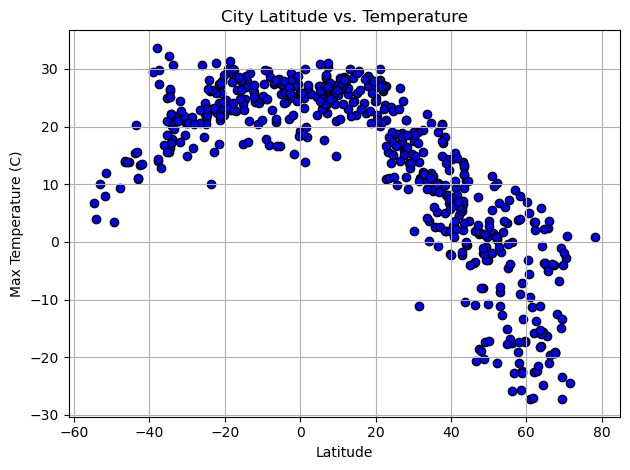

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("City Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

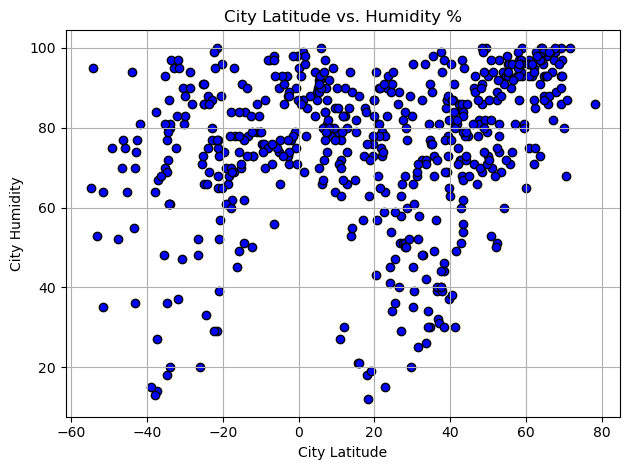

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs. Humidity %")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

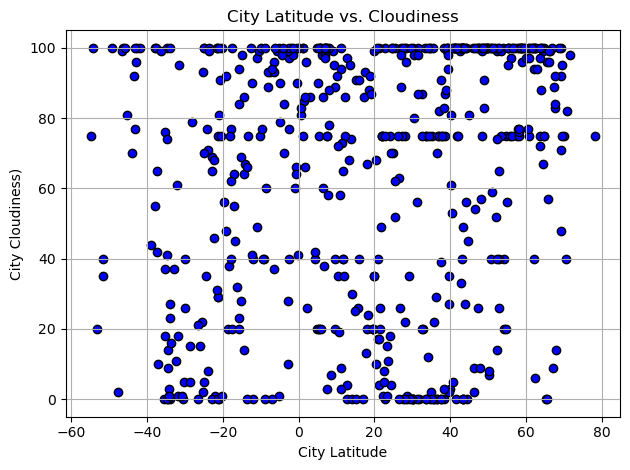

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

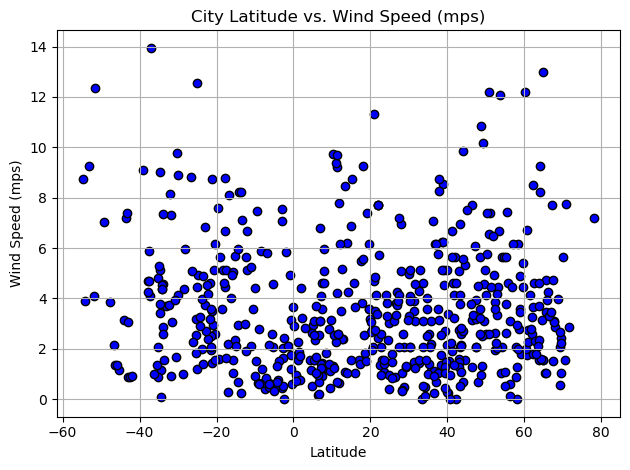

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("City Latitude vs. Wind Speed (mps)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.31,81,100,4.63,US,1701040699
3,huntsville,34.7304,-86.5861,11.89,91,100,4.02,US,1701040440
4,kwang binh,17.4833,106.6000,22.40,85,93,5.49,VN,1701040700
7,iskateley,67.6803,53.1512,-19.19,99,83,3.11,RU,1701040702
8,georgetown,5.4112,100.3354,25.96,92,20,1.54,MY,1701040702


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.51,75,100,7.04,TF,1701040501
2,east london,-33.0153,27.9116,21.13,95,37,3.71,ZA,1701040700
5,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701040701
6,avarua,-21.2078,-159.7750,27.03,65,75,8.75,CK,1701040701
9,bredasdorp,-34.5322,20.0403,16.30,80,14,1.14,ZA,1701040702


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7463083117236979


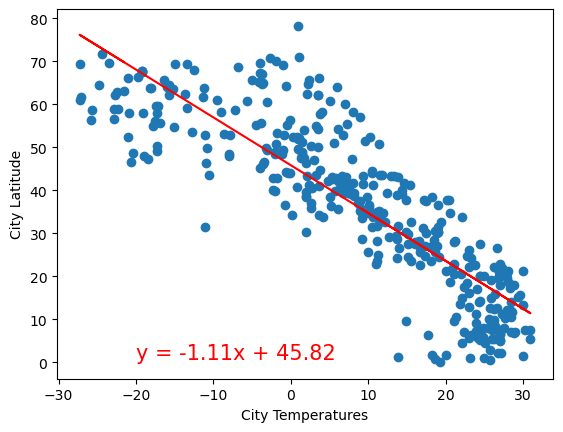

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.33020686387583725


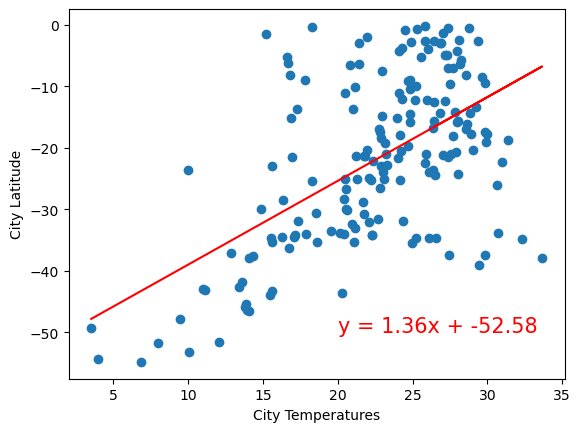

In [41]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()



**Discussion about the linear relationship:** The Northern hemisphere has a very strong correlation between temperature and latitude as can be seen from the scatterplots above - the closer the latitude to the equator, the higher the temperature goes while conversely, the further away, the colder it gets! The r-squared score of the Northern hemi is almost 0.8.
In the Southern hemisphere, the r-squared score is less than 0.4 but there is still a relatively strong correlation between higher temperatures and distance from the equator.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05658786942911807


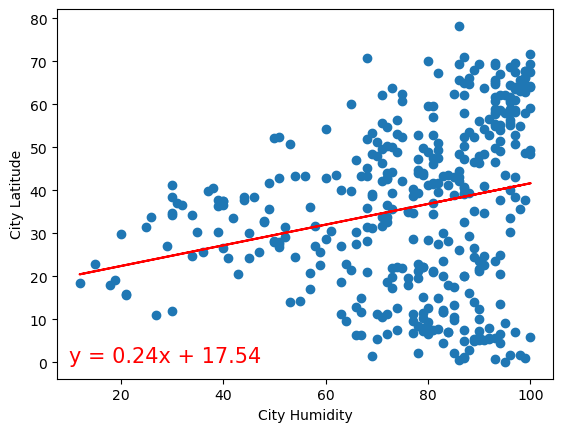

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('City Humidity')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09514951869641856


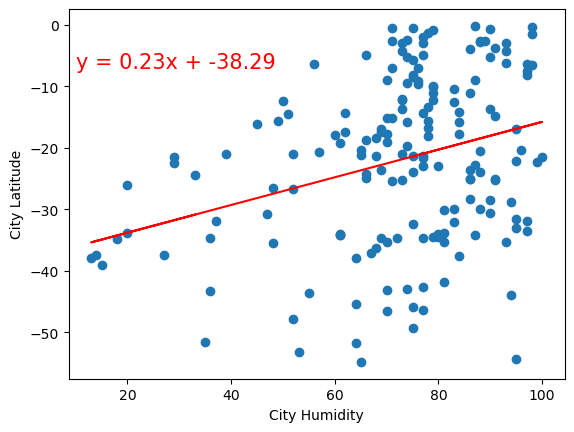

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-7
                     ),fontsize=15,color="red")
plt.xlabel('City Humidity')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very slightly positive relationship between humidity and latitude in both the Northern and Southern Hemispheres as can be seen from the plots although both r-squared scores are less than 0.1 indicating that the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03560063073278024


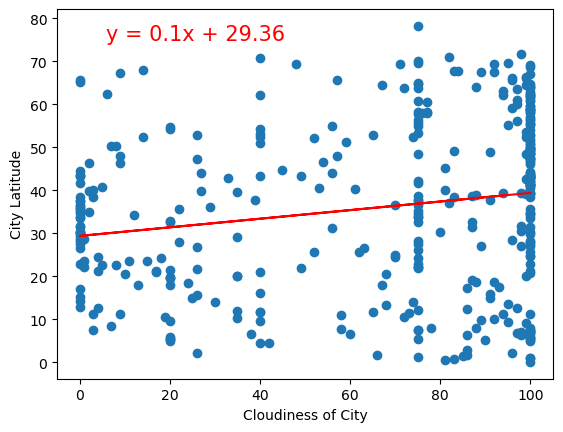

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,75),fontsize=15,color="red")
plt.xlabel('Cloudiness of City')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03040306150859602


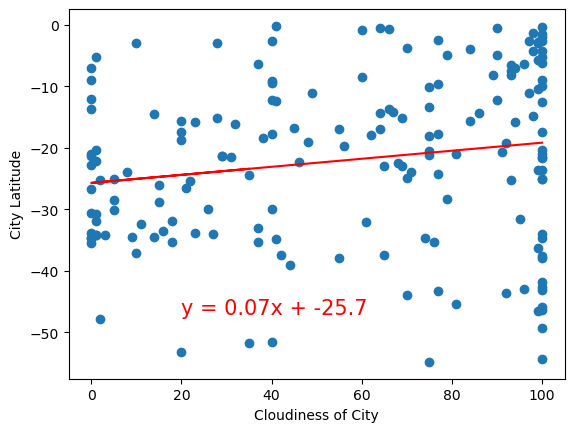

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, -47),fontsize=15,color="red")
plt.xlabel('Cloudiness of City')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is not a strong positive or negative correlation between Cloudiness and Latitude. Both scatterplots show almost perfectly horizontal lines and the r-squared scores are both ~ 0.03, solidifying this point.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015044279499011234


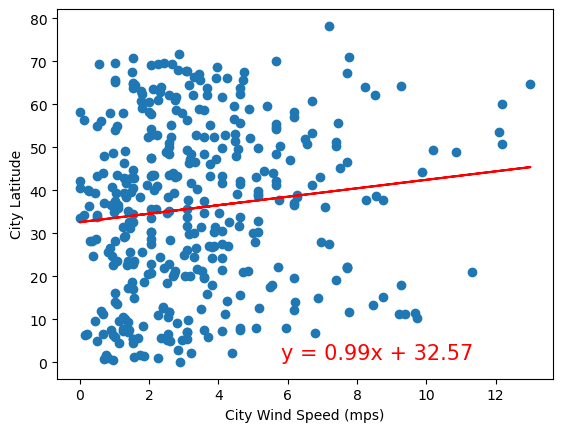

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('City Wind Speed (mps)')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07614386849820588


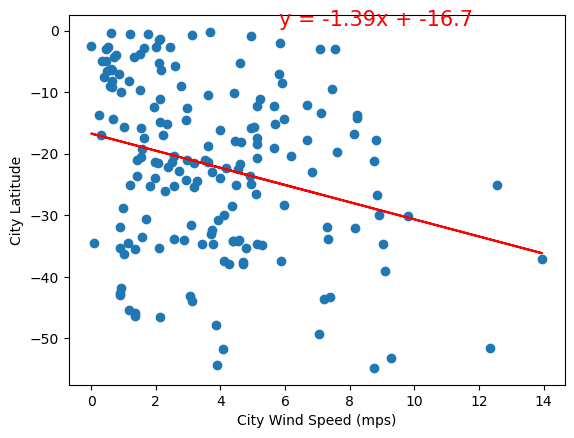

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('City Wind Speed (mps)')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong positive or negative correlation between wind speed and latitude in either hemisphere.